# Using causal-ccm to infer causality in time series data

In 2012, Sugihara et al. formulated the [Convergent Cross Mapping (CCM)](https://science.sciencemag.org/content/338/6106/496) methodology for inferring causality between elements in a complex system using just time-series data (no model of the system needed). 

In this notebook, we show an example how to use `causal-ccm` package to apply CCM on time series data.

## Installation
`pip install causal-ccm`

In [1]:
from causal_ccm.causal_ccm import ccm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm # for showing progress bar in for loops
import numpy as np

## Functions

In [2]:
def chaotic_func(A, B, r, beta):
    return A * (r - r * A - beta * B)

In [3]:
def viz_ccm(func, X, Y, L_range, tau, E):
    Xhat_My, Yhat_Mx = [], [] # correlation list
    for L in tqdm(L_range): 
        ccm_XY = func(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
        ccm_YX = func(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X    

        # lowest value must be 0 -- following the process of the original paper
        # implement this in the package as an option
        rho_xy = np.max([0, ccm_XY.causality()[0]])
        rho_yx = np.max([0, ccm_YX.causality()[0]])

        Xhat_My.append(rho_xy) 
        Yhat_Mx.append(rho_yx) 

    # plot convergence as L->inf. Convergence is necessary to conclude causality
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    ax.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$', linewidth=2)
    ax.plot(L_range, Yhat_Mx, c='r', label='$\hat{Y}(t)|M_x$', linewidth=2)
    ax.set_xlabel('L', size=15)
    ax.set_ylabel('correl', size=15)
    ax.legend(prop={'size': 20})  
    
    return ax

## Chaotic System 1

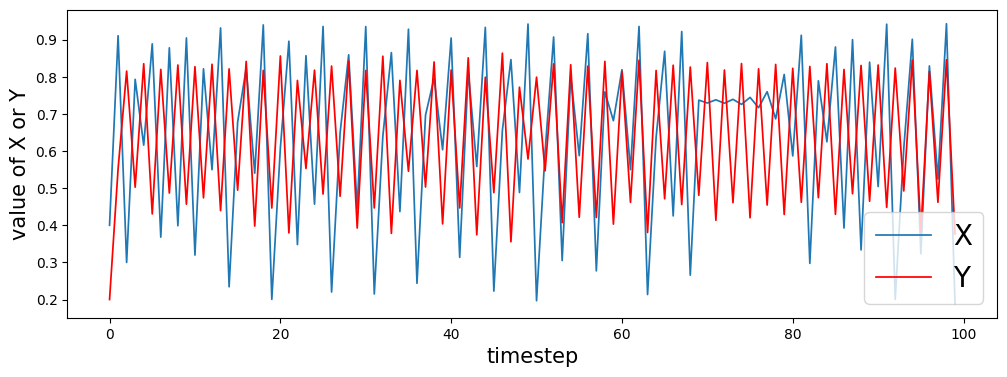

In [4]:
# FROM Supplementary Materials https://www.science.org/doi/10.1126/science.1227079
# params
r_x = 3.8
r_y = 3.5
B_xy = 0.02 # effect on x given y (effect of y on x)
B_yx = 0.1 # effect on y given x (effect of x on y)

X0 = 0.4 # initial val following Sugihara et al
Y0 = 0.2 # initial val following Sugihara et al
t = 3000 # time steps

X = [X0]
Y = [Y0]
for i in range(t):
    X_ = chaotic_func(X[-1], Y[-1], r_x, B_xy)
    Y_ = chaotic_func(Y[-1], X[-1], r_y, B_yx)    
    X.append(X_)
    Y.append(Y_)   
    
max_t = 100    
plt.figure(figsize=(12,4))
plt.plot(X[:max_t], linewidth=1.25, label='X')
plt.plot(Y[:max_t], c='r', linewidth=1.25, label='Y')
plt.xlabel('timestep', size=15)
plt.ylabel('value of X or Y', size=15)
plt.legend(prop={'size': 20})    

100%|██████████| 60/60 [00:29<00:00,  2.06it/s]


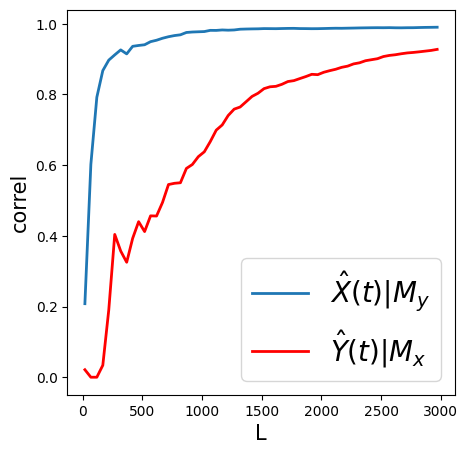

In [5]:
# checking convergence
# Looking at "convergence"
L_range = range(20, t, 50) # L values to test
tau = 1
E = 2

ax = viz_ccm(ccm, X, Y, L_range, tau, E)

**Interpretation of the chart above:** 
<br>X causes Y and Y causes X. The effect of X on Y is stronger than the effect of Y on X. Note that we also check the p-values below and they are < 0.05

In [6]:
tau = 1 # time lag
E = 2 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# Check correlation plot
ccm_XY = ccm(X, Y, tau, E, L)
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
print(ccm_XY.causality()) 

# Check correlation plot
# to fix
ccm_YX = ccm(Y, X, tau, E, L)
# causality Y -> X
# returns: (correlation ("strength" of causality), p-value(significance))
print(ccm_YX.causality())

(0.9905052971672805, 0.0)
(0.9287789831498575, 0.0)


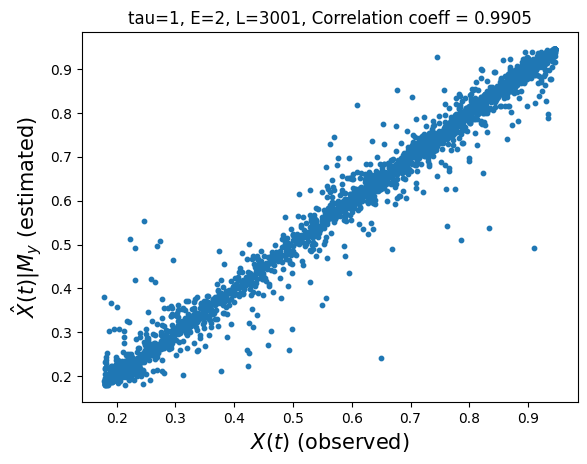

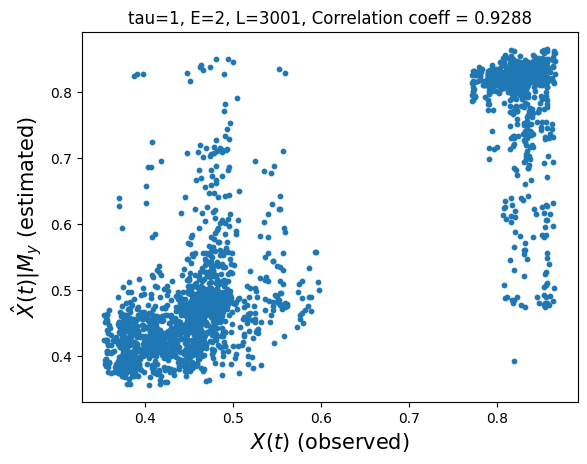

In [7]:
ccm_XY.plot_ccm_correls()
ccm_YX.plot_ccm_correls() 

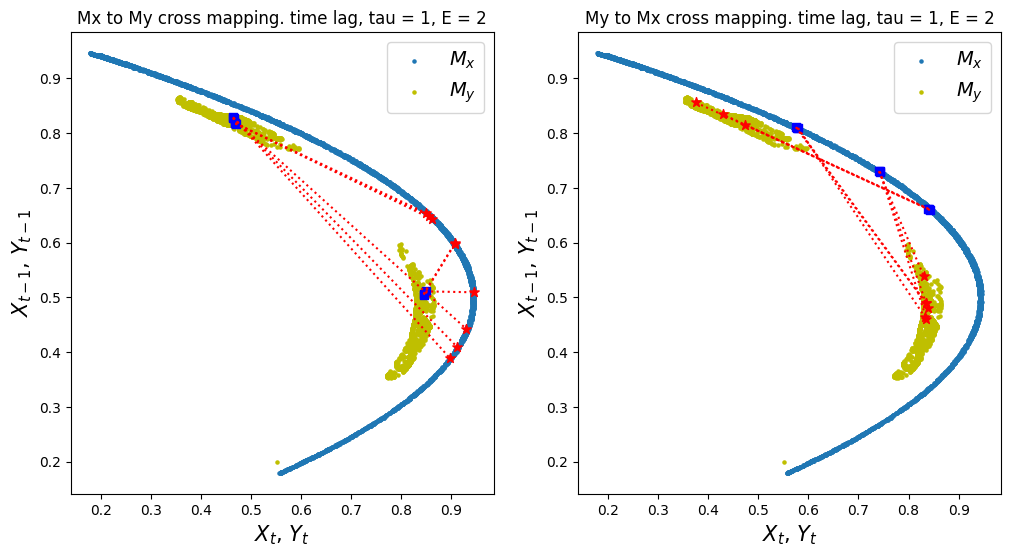

In [8]:
# visualize sample cross mapping
ccm_XY.visualize_cross_mapping()

## Chaotic System 2

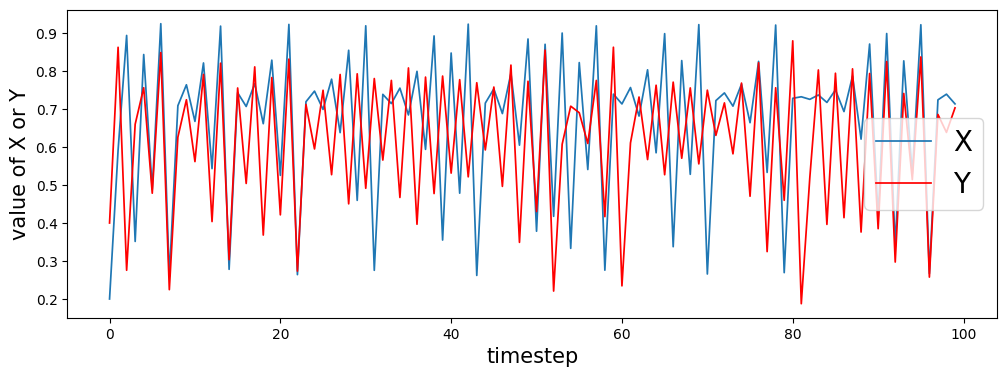

In [9]:
# FROM Supplementary Materials https://www.science.org/doi/10.1126/science.1227079
# params
r_x = 3.7
r_y = 3.7
B_xy = 0.0 # effect on x given y (effect of y on x)
B_yx = 0.32 # effect on y given x (effect of x on y)

X0 = 0.2 # initial val following Sugihara et al
Y0 = 0.4 # initial val following Sugihara et al
t = 1000 # time steps

X = [X0]
Y = [Y0]
for i in range(t):
    X_ = chaotic_func(X[-1], Y[-1], r_x, B_xy)
    Y_ = chaotic_func(Y[-1], X[-1], r_y, B_yx)    
    X.append(X_)
    Y.append(Y_)   
    
max_t = 100    
plt.figure(figsize=(12, 4))
plt.plot(X[:max_t], linewidth=1.25, label='X')
plt.plot(Y[:max_t], c='r', linewidth=1.25, label='Y')
plt.xlabel('timestep', size=15)
plt.ylabel('value of X or Y', size=15)
plt.legend(prop={'size': 20})    


100%|██████████| 20/20 [00:01<00:00, 16.97it/s]


<Axes: xlabel='L', ylabel='correl'>

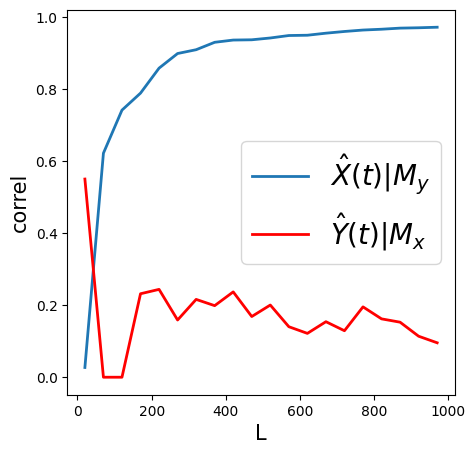

In [10]:
# checking convergence
# Looking at "convergence"
L_range = range(20, t, 50) # L values to test
tau = 1
E = 2

ax = viz_ccm(ccm, X, Y, L_range, tau, E)
ax

**Interpretation of the chart above** 
<br>X causes Y but Y does not cause X. Note we also check the p-values below and they are < 0.05

(0.9739236190309515, 0.0)
(0.11220101144394119, 0.0003781223685327501)


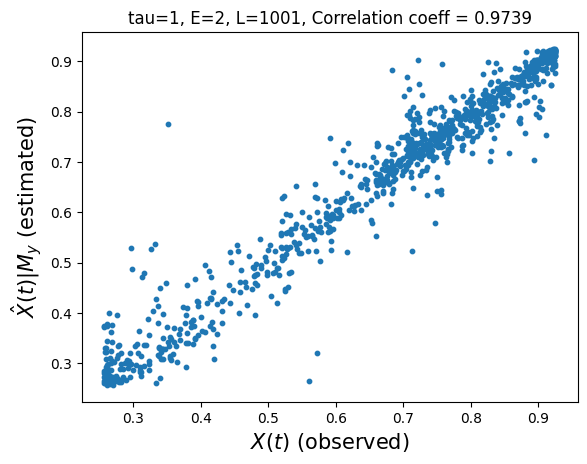

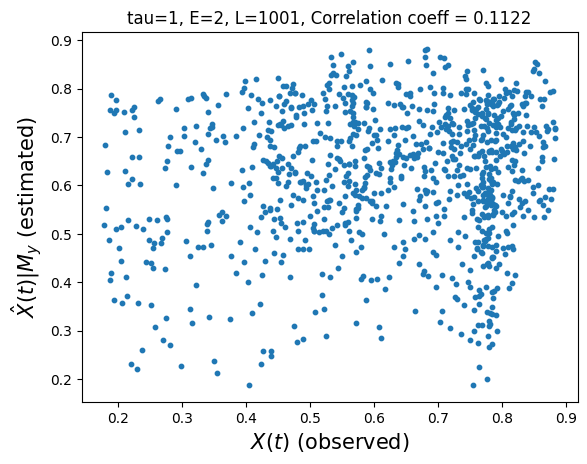

In [11]:
tau = 1 # time lag
E = 2 # shadow manifold embedding dimensions
L = len(X) # length of time period to consider

# Check correlation plot
ccm_XY = ccm(X, Y, tau, E, L)
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
print(ccm_XY.causality()) 

# Check correlation plot
# to fix
ccm_YX = ccm(Y, X, tau, E, L)
# causality Y -> X
# returns: (correlation ("strength" of causality), p-value(significance))
print(ccm_YX.causality())

ccm_XY.plot_ccm_correls()
ccm_YX.plot_ccm_correls() 

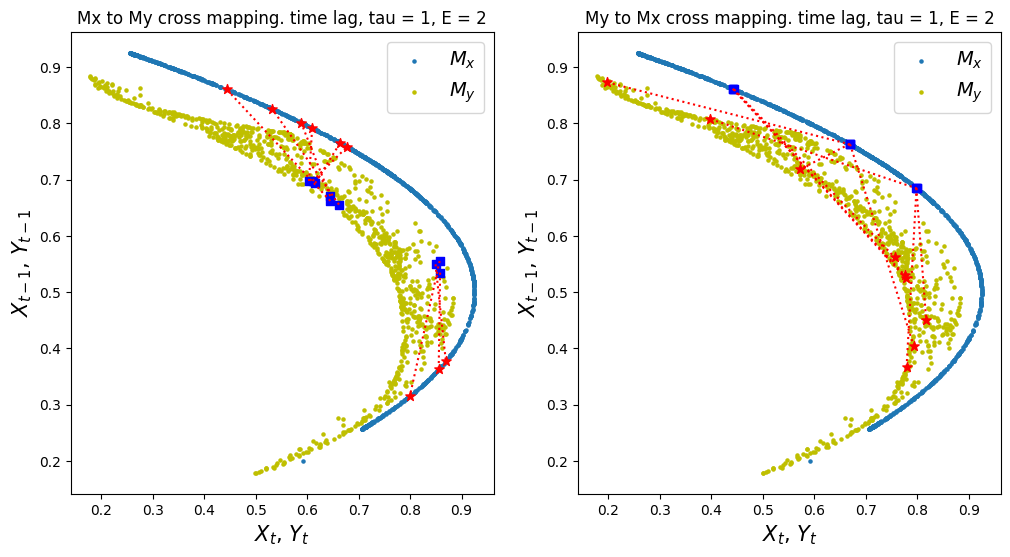

In [12]:
# visualize sample cross mapping
ccm_XY.visualize_cross_mapping()

## Additional Feature - Pairwise Asymmetric Inference, PAI (see McCracken (2014))
manifold_pattern=[[0, -1, -2],[0]], tau=2 is the same as the shadow manifold (X_t, X_{t-1*2}, X_{t-2*2}, Y_t)

In [13]:
from causal_ccm.pai import pai

In [14]:
tau = 1 # time lag
manifold_pattern=[[0, -1, -2],[0]]
L = len(X) # length of time period to consider

pai_XY = pai(X, Y, tau, manifold_pattern, L)

# Check correlation plot
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))
print(pai_XY.causality()) 

(0.999316711093863, 0.0)


100%|██████████| 20/20 [00:01<00:00, 16.97it/s]


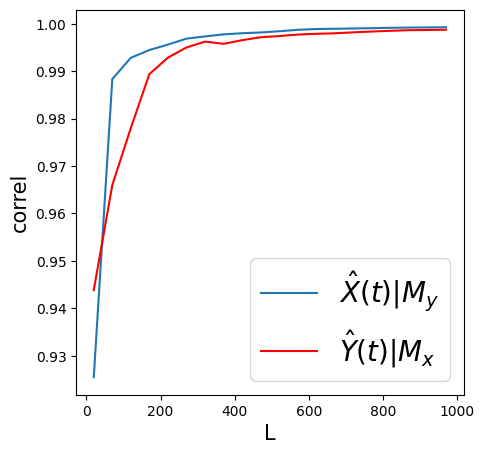

In [15]:
Xhat_My, Yhat_Mx = [], [] # correlation list
for L in tqdm(L_range): 
    pai_XY = pai(X, Y, tau, manifold_pattern, L) # define new pai object # Testing for X -> Y
    pai_YX = pai(Y, X, tau, manifold_pattern, L) # define new pai object # Testing for Y -> X    
    Xhat_My.append(pai_XY.causality()[0]) 
    Yhat_Mx.append(pai_YX.causality()[0]) 
    
# plot convergence as L->inf. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, c='r', label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=15)
plt.ylabel('correl', size=15)
plt.legend(prop={'size': 20})    
    

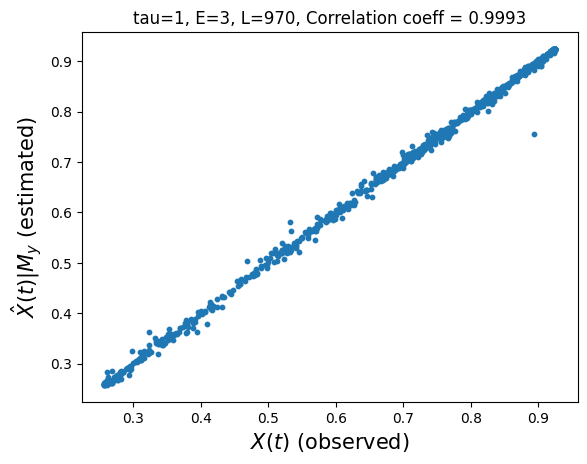

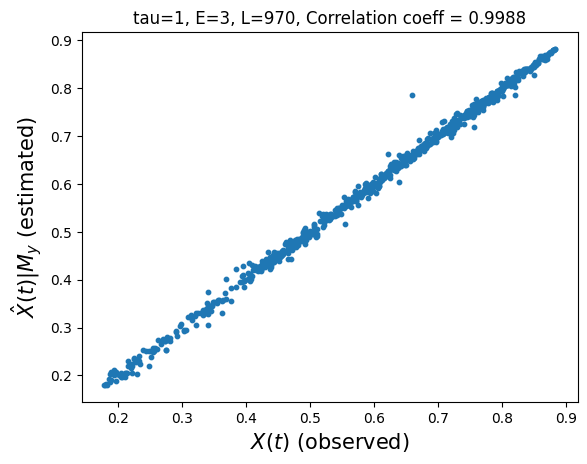

In [16]:
pai_XY.plot_ccm_correls()
pai_YX.plot_ccm_correls()

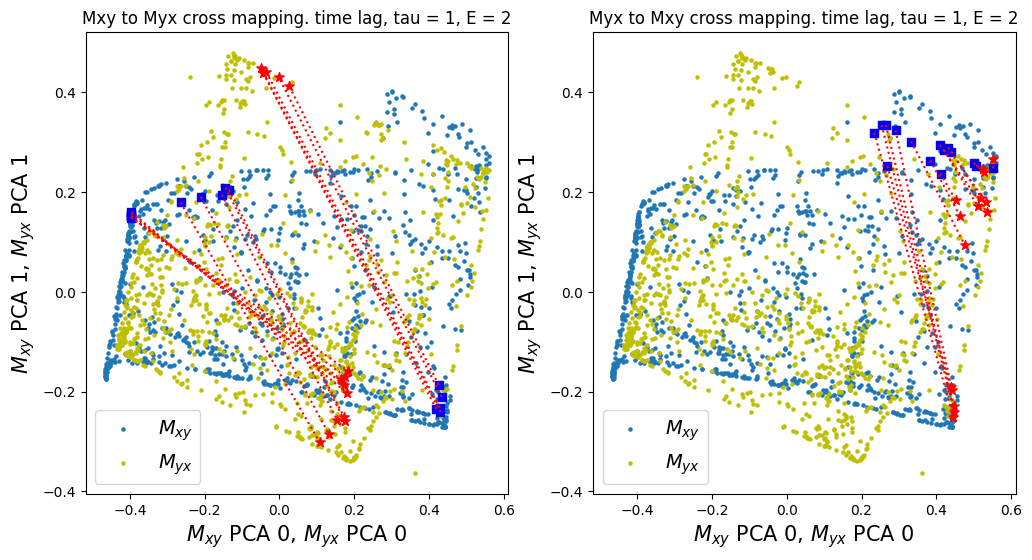

In [17]:
# visualize sample cross mapping
pai_XY.visualize_cross_mapping()